In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix

In [3]:
from xgboost import XGBClassifier
xgb_cl = XGBClassifier()

In [4]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
SC = StandardScaler()
X_scaled = SC.fit_transform(X)

In [10]:
XS_train, XS_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size= 0.33, stratify=Y)

In [11]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
xgb_cl.fit(X_train,Y_train)

R2_train = np.round(xgb_cl.score(X_train,Y_train),3)
R2_test  = np.round(xgb_cl.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

#r2_train = cross_val_score(xgb_cl,X_train, Y_train, cv = 3)
#r2_test  = cross_val_score(xgb_cl,X_test, Y_test, cv = 3)
#print(np.mean(r2_train))
#print(np.mean(r2_test))

Training score is :1.0
Testing  score is :0.391


In [34]:
#gamma = [10.0**i for i in range(-5,5,1)]
#max_depth = [10*i for i in np.arange(1,10)]
#max_delta_step = [1,2,3,4,5,6,7,8,9,10]

xgb_cl = XGBClassifier(gamma = 4, max_depth = 10)
xgb_cl.set_params(random_state=144)
xgb_cl.fit(X_train,Y_train)

R2_train = np.round(xgb_cl.score(X_train,Y_train),3)
R2_test  = np.round(xgb_cl.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.539
Testing  score is :0.5


In [35]:
Y_0 = Y_train==0
Y_1 = Y_train==1
Y_2 = Y_train==2
Y_3 = Y_train==3
Y_4 = Y_train==4

In [36]:
prob_train = xgb_cl.predict_proba(X_train)
prob_test  = xgb_cl.predict_proba(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
conf_data_train = confusion_matrix(Y_train,xgb_cl.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,xgb_cl.predict(X_test))

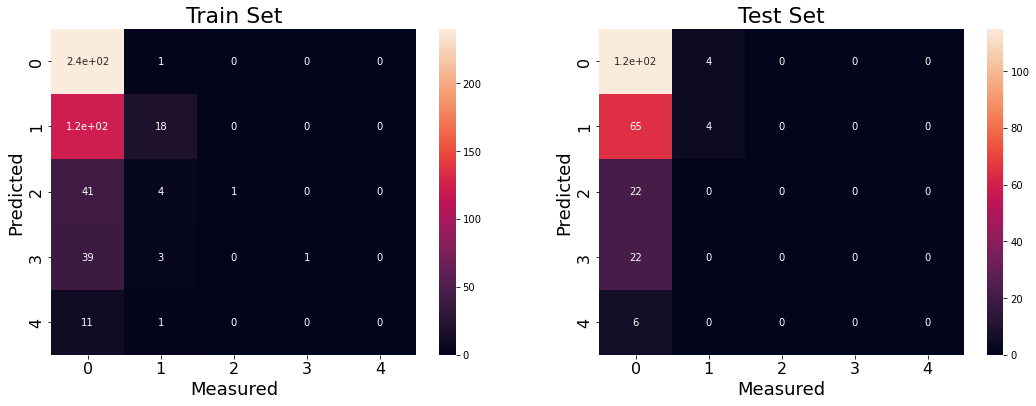

In [39]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

In [40]:
conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)

****************************************************************************************************


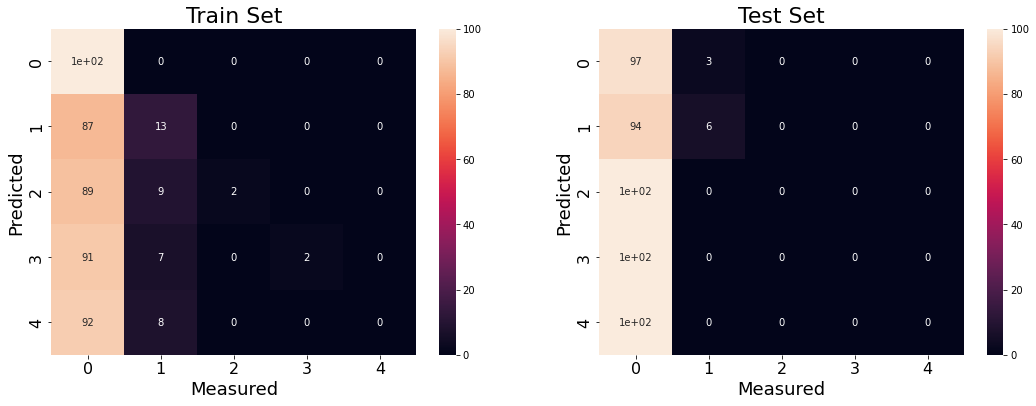

In [41]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);